In [34]:
import netCDF4
import xarray as xr
import pandas as pd
from numpy.ma import log10
import itertools
from matplotlib.pyplot import subplots, colorbar, cm
import matplotlib.colors as mcolors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.dates import date2num, DateFormatter, HourLocator
%matplotlib inline

In [12]:
import os

import datetime

from datetime import datetime

from datetime import timedelta

import numpy as np
 
import matplotlib

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

import matplotlib.patches as mpatches

from matplotlib.collections import LineCollection

from matplotlib.colors import ListedColormap, BoundaryNorm

import matplotlib.colors as colors

from matplotlib.colors import LinearSegmentedColormap

import matplotlib.cbook as cbook

In [13]:
datapath = r"C:\Users\harr732\OneDrive - PNNL\Documents\Data"
os.listdir(datapath)[0]
file = os.listdir(datapath)[7]

In [14]:
filename = os.path.join(datapath, file)

In [15]:
folder1_path = os.path.join('C:','Users', 'harr732', 'OneDrive - PNNL','Documents', 'Data')

In [16]:
 os.path.exists(folder1_path)

False

In [17]:
def getCLOUDVAP(filename):
 
    # Get Data
    with xr.open_dataset(filename) as ds:
        ds
    time = ds['time'].data
    height = ds['height'].data
    cldphase_mplgr = ds['cloud_phase_mplgr'].data
    cldphase_layer_mplgr = ds['cloud_phase_layer_mplgr'].data
    mpl_dep = ds['mpl_linear_depol_ratio'].data
    mpl_backscat = ds['mpl_backscatter'].data * \
    (ds['height'].data**2)
    mpl_backscat[mpl_backscat <= 0] = 10**-9
    ds['mpl_backscatter'].data = mpl_backscat
    ds['mpl_backscatter'].attrs[
    'units'] = f"log10({ds['mpl_backscatter'].attrs['units']})"
    arscl_cloud_top = ds['cloud_layer_top_height'].data
    arscl_cloud_base = ds['cloud_layer_base_height'].data
    arscl_ze = ds['reflectivity_best_estimate'].data
    arscl_ze_snr = ds['radar_signal_to_noise_ratio'].data
    arscl_w = ds['spectral_width'].data
    arscl_mdv = ds['mean_doppler_velocity'].data
    combined_ze = arscl_ze.copy()
    combined_mdv = arscl_mdv.copy()
    combined_w = arscl_w.copy()
    mwr_lwp = ds['mwrret1liljclou_be_lwp'].data
    sonde_temp = ds['temp'].data
    mpl_backscat_ts = log10(mpl_backscat).transpose()
    
    cldphase_layer_pixel = np.zeros(mpl_backscat.shape, dtype=int)
    for j, k in itertools.product(range(0, len(time)), range(0, 10)):
        cloud_top_jk = arscl_cloud_top[j, k] * 0.001
        cloud_base_jk = arscl_cloud_base[j, k] * 0.001
        if(cloud_top_jk > 0) and (cloud_base_jk > 0):
            if(cldphase_layer_mplgr[j, k] == 1):
                cldphase_layer_pixel[j, np.where(
                    (height <= cloud_top_jk) & (height >= cloud_base_jk))] = 1
            if(cldphase_layer_mplgr[j, k] == 2):
                cldphase_layer_pixel[j, np.where(
                    (height <= cloud_top_jk) & (height >= cloud_base_jk))] = 2
            if(cldphase_layer_mplgr[j, k] == 3):
                cldphase_layer_pixel[j, np.where(
                    (height <= cloud_top_jk) & (height >= cloud_base_jk))] = 3
    return {"time": time, "height": height, "cldphase_mplgr": cldphase_mplgr,"cldphase_layer_mplgr": cldphase_layer_mplgr, "mpl_dep": mpl_dep, "mpl_backscat": mpl_backscat,"arscl_cloud_top": arscl_cloud_top, "arscl_cloud_base": arscl_cloud_base, "arscl_ze": arscl_ze, "arscl_ze_snr": arscl_ze_snr, "arscl_w": arscl_w, "arscl_mdv": arscl_mdv,"combined_ze": combined_ze, "combined_mdv": combined_mdv, "combined_w": combined_w,"mwr_lwp": mwr_lwp, "sonde_temp": sonde_temp, "mpl_backscat_ts": mpl_backscat_ts,"cldphase_layer_pixel": cldphase_layer_pixel}
# How to use:
# d = getCLOUDVAP(filename)
# time = d["time"]       

In [18]:
 d = getCLOUDVAP(filename)

In [21]:
d

{'time': array(['2021-10-08T00:00:00.000000000', '2021-10-08T00:00:30.000000000',
        '2021-10-08T00:01:00.000000000', ...,
        '2021-10-08T23:58:30.000000000', '2021-10-08T23:59:00.000000000',
        '2021-10-08T23:59:30.000000000'], dtype='datetime64[ns]'),
 'height': array([ 0.16,  0.19,  0.22,  0.25,  0.28,  0.31,  0.34,  0.37,  0.4 ,
         0.43,  0.46,  0.49,  0.52,  0.55,  0.58,  0.61,  0.64,  0.67,
         0.7 ,  0.73,  0.76,  0.79,  0.82,  0.85,  0.88,  0.91,  0.94,
         0.97,  1.  ,  1.03,  1.06,  1.09,  1.12,  1.15,  1.18,  1.21,
         1.24,  1.27,  1.3 ,  1.33,  1.36,  1.39,  1.42,  1.45,  1.48,
         1.51,  1.54,  1.57,  1.6 ,  1.63,  1.66,  1.69,  1.72,  1.75,
         1.78,  1.81,  1.84,  1.87,  1.9 ,  1.93,  1.96,  1.99,  2.02,
         2.05,  2.08,  2.11,  2.14,  2.17,  2.2 ,  2.23,  2.26,  2.29,
         2.32,  2.35,  2.38,  2.41,  2.44,  2.47,  2.5 ,  2.53,  2.56,
         2.59,  2.62,  2.65,  2.68,  2.71,  2.74,  2.77,  2.8 ,  2.83,
         2.

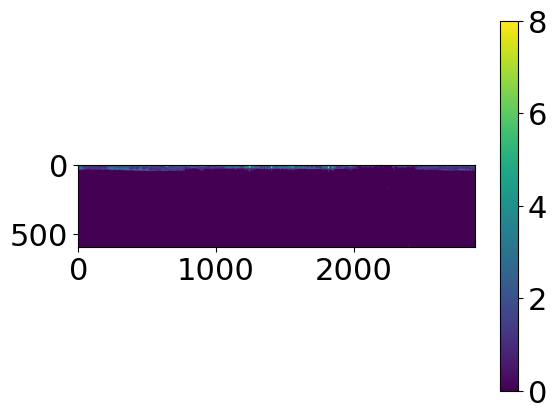

In [43]:
fig, ax = plt.subplots()
heatmap = ax.imshow(d['cldphase_mplgr'].transpose())
plt.colorbar(heatmap, ax=ax)


<xarray.Dataset>
Dimensions:                            (time: 2880, bound: 2, height: 596,
                                        layer: 10)
Coordinates:
  * time                               (time) datetime64[ns] 2021-10-08 ... 2...
  * height                             (height) float32 0.16 0.19 ... 18.01
  * layer                              (layer) int32 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: bound
Data variables: (12/47)
    base_time                          datetime64[ns] ...
    time_offset                        (time) datetime64[ns] dask.array<chunksize=(2880,), meta=np.ndarray>
    time_bounds                        (time, bound) datetime64[ns] dask.array<chunksize=(2880, 2), meta=np.ndarray>
    cloud_flag                         (time, height) float64 dask.array<chunksize=(2880, 596), meta=np.ndarray>
    cloud_phase_hsrl                   (time, height) float64 dask.array<chunksize=(2880, 596), meta=np.ndarray>
    qc_cloud_phase_hsrl                (time, height) int32 dask.array<chunksize=(2880, 596), meta=np.ndarray>
    ...                                 ...
    mwrret1liljclou_be_pwv             (time) float32 dask.array<chunksize=(2880,), meta=np.ndarray>
    mwrret1liljclou_tbsky23            (time) float32 dask.array<chunksize=(2880,), meta=np.ndarray>
    mwrret1liljclou_tbsky31            (time) float32 dask.array<chunksize=(2880,), meta=np.ndarray>
    lat                                float32 ...
    lon                                float32 ...
    alt                                float32 ...
Attributes: (12/57)
    command_line:                                      thermocldphase -s nsa ...
    Conventions:                                       ARM-1.3
    process_version:                                   vap-thermocldphase-0.3...
    dod_version:                                       thermocldphase-c1-1.3
    input_datastreams:                                 nsa30smplcmask1zwangC1...
    site_id:                                           nsa
    ...                                                ...
    hsrl_weak_backscatter_threshold_comment:           Backscatter threshold ...
    top_backscatter_grad_threshold:                    10.0
    top_backscatter_grad_threshold_comment:            Threshold of backscatt...
    base_backscatter_grad_threshold:                   1.0
    base_backscatter_grad_threshold_comment:           Threshold of backscatt...
    history:                                           created by user levin ...

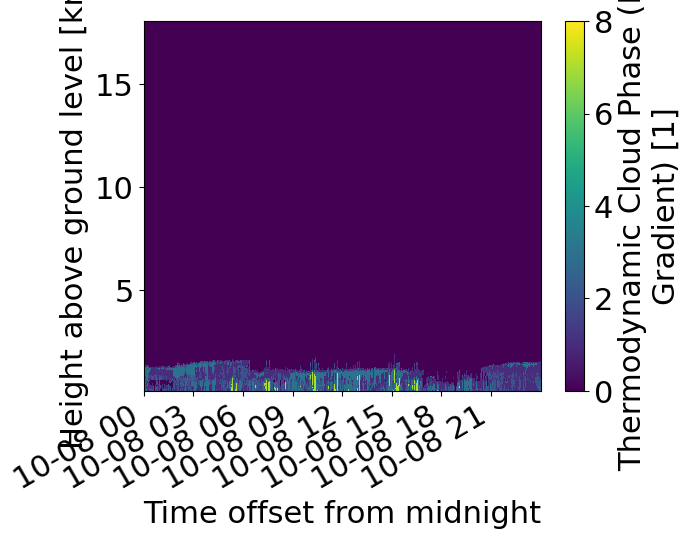

In [47]:
ds = xr.open_mfdataset(filename)
ds['cloud_phase_mplgr'].transpose().plot()
ds

In [52]:
ds['cloud_phase_mplgr']

<xarray.DataArray 'cloud_phase_mplgr' (time: 2880, height: 596)>
dask.array<open_dataset-cloud_phase_mplgr, shape=(2880, 596), dtype=float64, chunksize=(2880, 596), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-10-08 ... 2021-10-08T23:59:30
  * height   (height) float32 0.16 0.19 0.22 0.25 ... 17.92 17.95 17.98 18.01
Attributes:
    long_name:            Thermodynamic Cloud Phase (MPL Gradient)
    units:                1
    description:          Thermodynamic cloud phase determined from mpl lidar...
    flag_values:          [0 1 2 3 4 5 6 7 8]
    flag_meanings:        clear_sky liquid ice mixed_phase drizzle liquid_dri...
    ancillary_variables:  qc_cloud_phase_mplgr

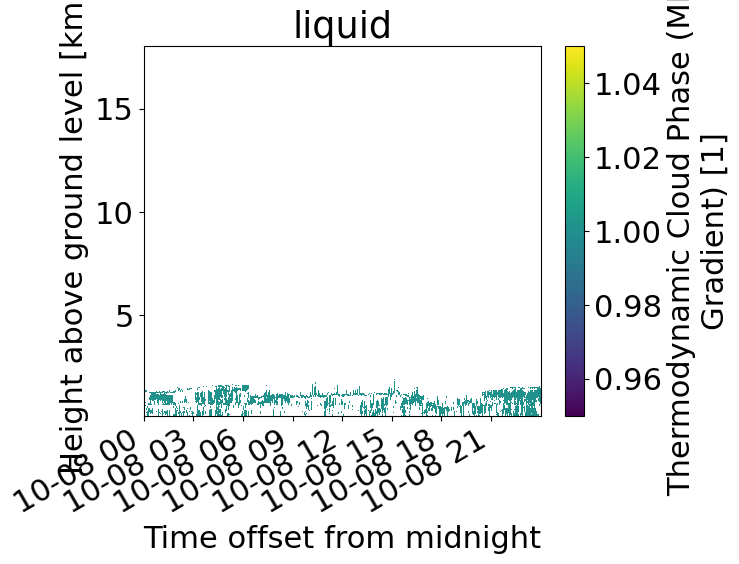

In [55]:
# Boolean indexing to get values where 'cloud_phase_mplgr' equals 1
values_equal_1 = ds['cloud_phase_mplgr'].where(ds['cloud_phase_mplgr'] == 1)
values_equal_1.transpose().plot()
# Add title
plt.title("liquid")

# Show the plot
plt.show()

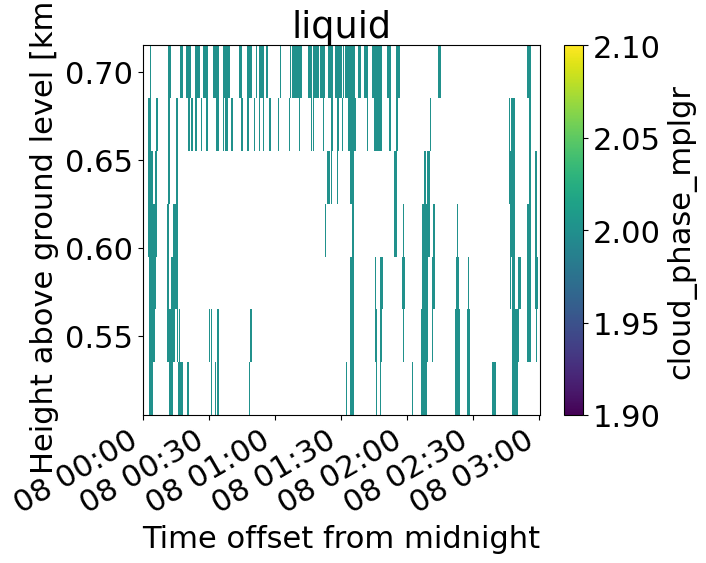

In [60]:
# Processing 
# Filter values where 'cloud_phase_mplgr' equals 1
filtered_data = ds['cloud_phase_mplgr'].where(ds['cloud_phase_mplgr'] == 1)

# Select data between hours 1 and 2
filtered_data = filtered_data.sel(time=slice('2021-10-08T00:00:00.000000000', '2021-10-08T3:00:00.000000000'))

# Select data between heights 0.5 and 0.7
filtered_data = filtered_data.sel(height=slice(0.5, 0.7))
# Boolean indexing to get values where 'cloud_phase_mplgr' equals 1
values_equal_1 = ds['cloud_phase_mplgr'].where(ds['cloud_phase_mplgr'] == 1)

value_equal_2 = values_equal_1+filtered_data
# Plotting

value_equal_2.transpose().plot()
# filtered_data.transpose().plot()


# Add title
plt.title("liquid")

# Show the plot
plt.show()

In [61]:
# Check the range of time values in your dataset
print("Minimum time value:", ds['time'].min().values)
print("Maximum time value:", ds['time'].max().values)

Minimum time value: 2021-10-08T00:00:00.000000000
Maximum time value: 2021-10-08T23:59:30.000000000


In [67]:
filtered_data

<xarray.DataArray 'cloud_phase_mplgr' (time: 361, height: 7)>
dask.array<getitem, shape=(361, 7), dtype=float64, chunksize=(361, 7), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-10-08 ... 2021-10-08T03:00:00
  * height   (height) float32 0.52 0.55 0.58 0.61 0.64 0.67 0.7
Attributes:
    long_name:            Thermodynamic Cloud Phase (MPL Gradient)
    units:                1
    description:          Thermodynamic cloud phase determined from mpl lidar...
    flag_values:          [0 1 2 3 4 5 6 7 8]
    flag_meanings:        clear_sky liquid ice mixed_phase drizzle liquid_dri...
    ancillary_variables:  qc_cloud_phase_mplgr